<a href="https://colab.research.google.com/github/Anish32/crop-yield-prediction/blob/main/crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install catboost

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [19]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/crop-yield-prediction-dataset/yield.csv
/kaggle/input/crop-yield-prediction-dataset/temp.csv
/kaggle/input/crop-yield-prediction-dataset/rainfall.csv
/kaggle/input/crop-yield-prediction-dataset/pesticides.csv
/kaggle/input/crop-yield-prediction-dataset/yield_df.csv


In [20]:
data=pd.read_csv("/kaggle/input/crop-yield-prediction-dataset/yield_df.csv")
print(data.head(10))

   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   
5           5  Albania        Wheat  1990        30197   
6           6  Albania        Maize  1991        29068   
7           7  Albania     Potatoes  1991        77818   
8           8  Albania  Rice, paddy  1991        28538   
9           9  Albania      Sorghum  1991         6667   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0         

In [21]:
info = data.info()
description = data.describe(include='all')

info, description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


(None,
           Unnamed: 0   Area      Item          Year    hg/ha_yield  \
 count   28242.000000  28242     28242  28242.000000   28242.000000   
 unique           NaN    101        10           NaN            NaN   
 top              NaN  India  Potatoes           NaN            NaN   
 freq             NaN   4048      4276           NaN            NaN   
 mean    14120.500000    NaN       NaN   2001.544296   77053.332094   
 std      8152.907488    NaN       NaN      7.051905   84956.612897   
 min         0.000000    NaN       NaN   1990.000000      50.000000   
 25%      7060.250000    NaN       NaN   1995.000000   19919.250000   
 50%     14120.500000    NaN       NaN   2001.000000   38295.000000   
 75%     21180.750000    NaN       NaN   2008.000000  104676.750000   
 max     28241.000000    NaN       NaN   2013.000000  501412.000000   
 
         average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  
 count                     28242.00000       28242.000000  28242.

<ipython-input-22-c75084f9767b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_counts.values, y=area_counts.index, palette='coolwarm')


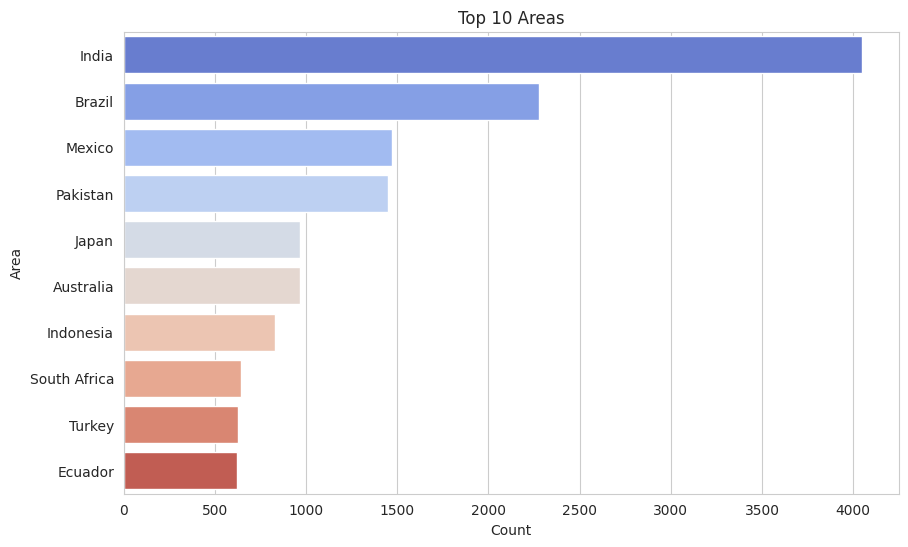

In [22]:
sns.set_style("whitegrid")

plt.rcParams['figure.figsize'] = [10, 6]

plt.figure()
area_counts = data['Area'].value_counts().head(10)
sns.barplot(x=area_counts.values, y=area_counts.index, palette='coolwarm')
plt.title('Top 10 Areas')
plt.xlabel('Count')
plt.ylabel('Area')
plt.show()

<ipython-input-23-36de5f2f8d55>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis')


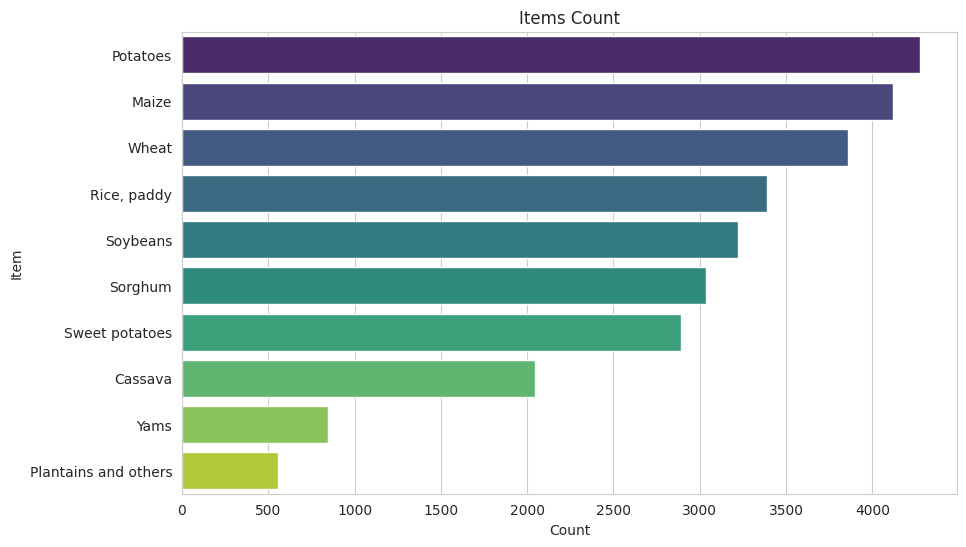

In [23]:
plt.figure()
item_counts = data['Item'].value_counts()
sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis')
plt.title('Items Count')
plt.xlabel('Count')
plt.ylabel('Item')
plt.show()


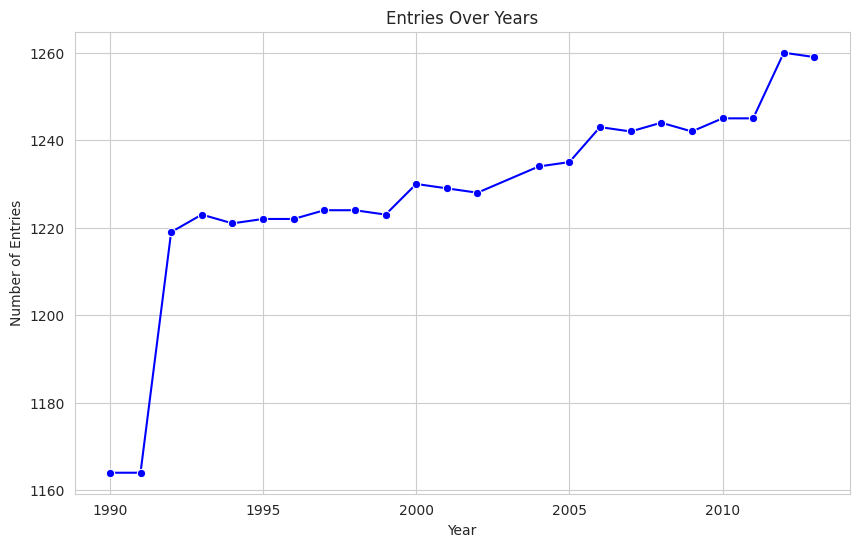

In [24]:
plt.figure()
year_counts = data['Year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='b')
plt.title('Entries Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.show()


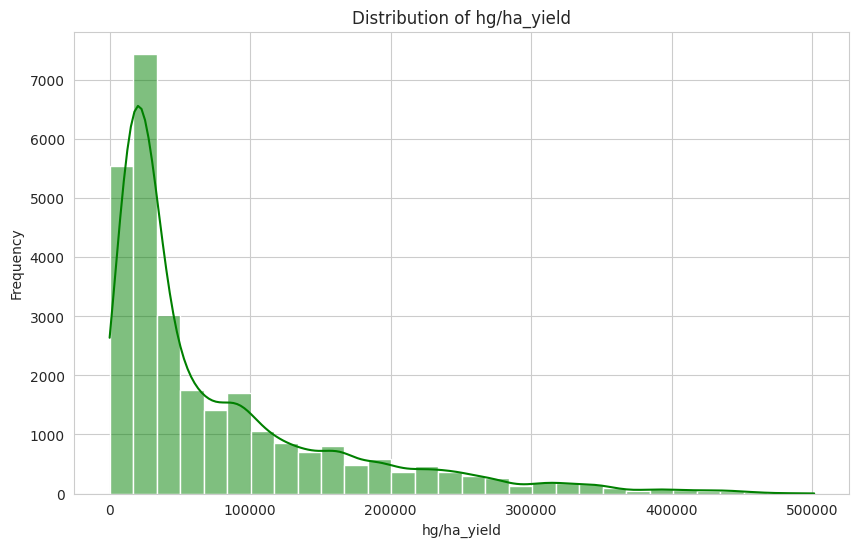

In [25]:
plt.figure()
sns.histplot(data['hg/ha_yield'], bins=30, kde=True, color='g')
plt.title('Distribution of hg/ha_yield')
plt.xlabel('hg/ha_yield')
plt.ylabel('Frequency')
plt.show()

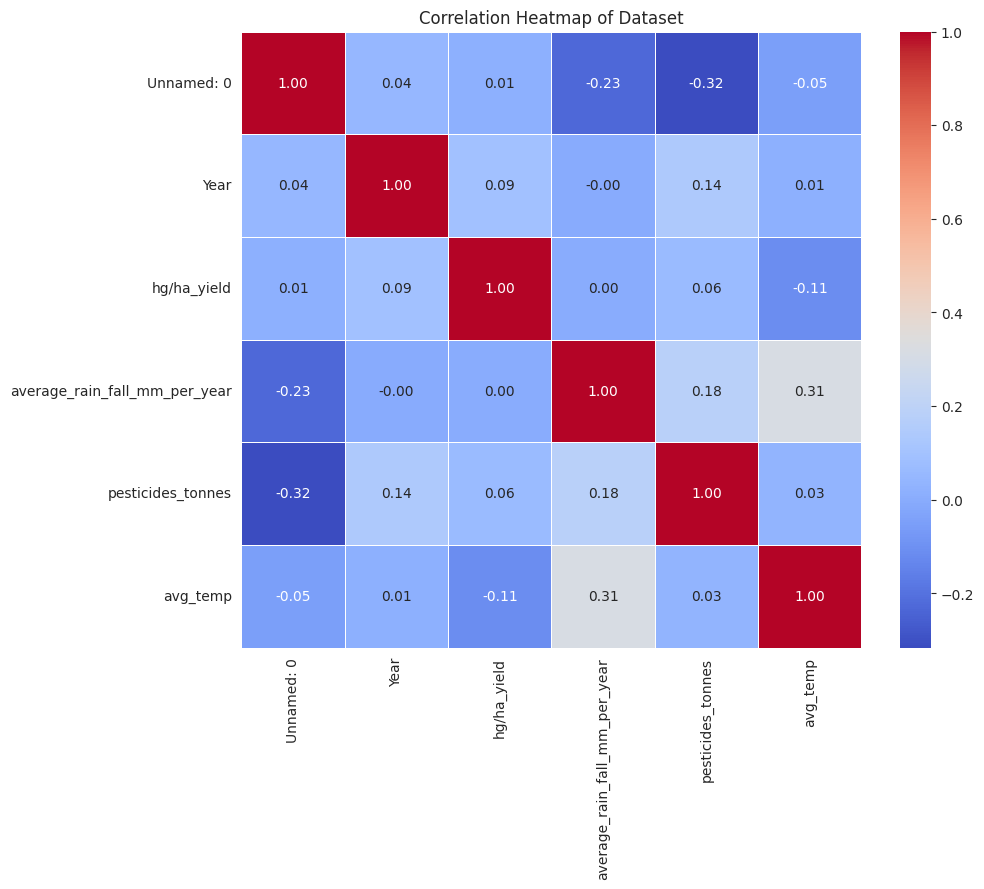

In [26]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Dataset')
plt.show()

In [27]:
data_renamed = data.rename(columns={
    "hg/ha_yield": "Yield",
    "average_rain_fall_mm_per_year": "Rainfall",
    "pesticides_tonnes": "Pesticides",
    "avg_temp": "Avg_Temp"
})

In [28]:
data_cleaned = data_renamed.drop(columns=["Unnamed: 0"])

In [29]:
le_country = LabelEncoder()
le_item = LabelEncoder()
data_cleaned['Country_Encoded'] = le_country.fit_transform(data_cleaned['Area'])
data_cleaned['Item_Encoded'] = le_item.fit_transform(data_cleaned['Item'])

In [30]:
X = data_cleaned[['Country_Encoded', 'Item_Encoded', 'Pesticides', 'Avg_Temp', 'Rainfall']]
y = data_cleaned['Yield']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#XGBRegressor

In [32]:
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
y_pred_xgb = xgb_model.predict(X_test)

In [34]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
accuracy_xgb = xgb_model.score(X_test, y_test)

print(f"RMSE XGBoot: {rmse_xgb}")
print(f"Acc XGBoost: {accuracy_xgb}")

RMSE XGBoot: 15710.225969094143
Acc XGBoost: 0.9659743309020996


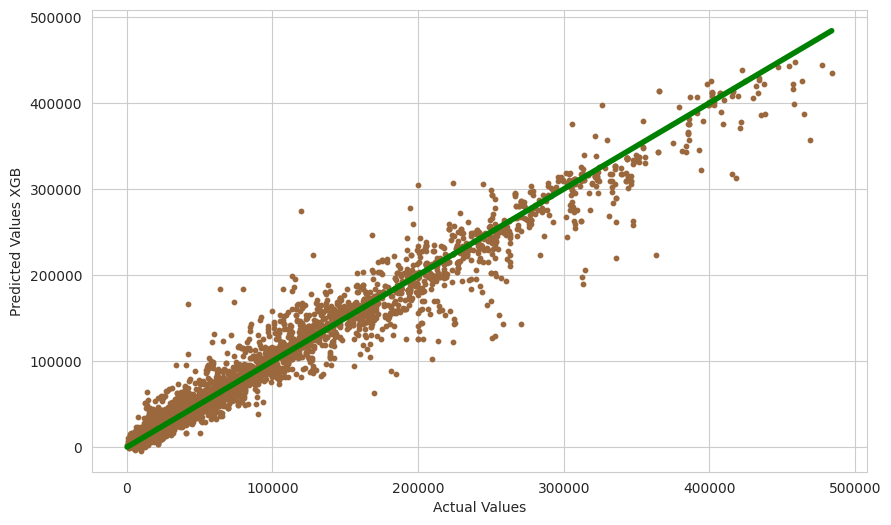

In [35]:
plt.scatter(y_test, y_pred_xgb,s=10,color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values XGB')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
plt.show()

#Randomforest


In [36]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
accuracy_rf = rf_model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

In [38]:
print(f"RMSE RF: {rmse_rf}")
print(f"MAE RF: {mae}")
print(f"R2 RF: {r2}")

RMSE RF: 14006.281839678952
MAE RF: 5628.164972093607
R2 RF: 0.9729549486438772


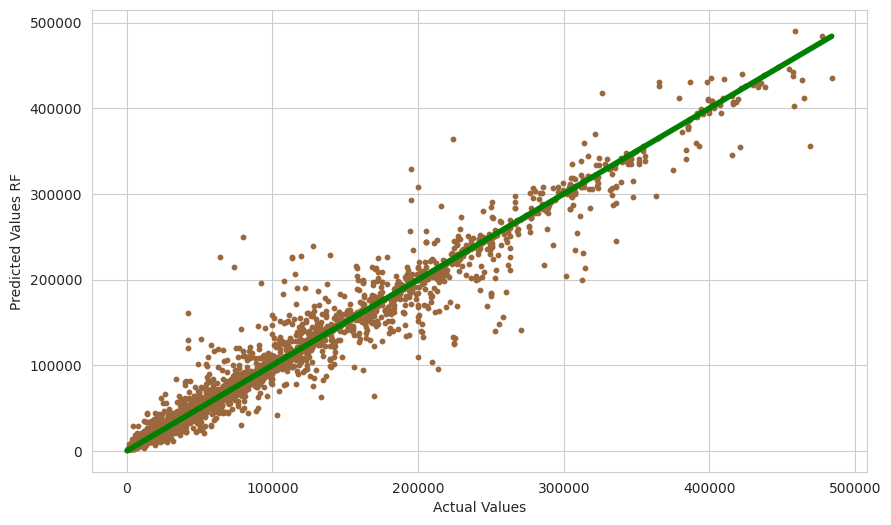

In [39]:
plt.scatter(y_test, y_pred_rf,s=10,color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values RF')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
plt.show()

# LinearRegression

In [40]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred_linear = linear_model.predict(X_test)

In [42]:
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

accuracy_linear = r2_linear

In [43]:
print(f"RMSE Linear Regression: {rmse_linear}")
print(f"R-squared Linear Regression: {r2_linear}")
print(f"Accuracy Linear Regression: {accuracy_linear}")

RMSE Linear Regression: 81779.33917978077
R-squared Linear Regression: 0.07800347967984644
Accuracy Linear Regression: 0.07800347967984644


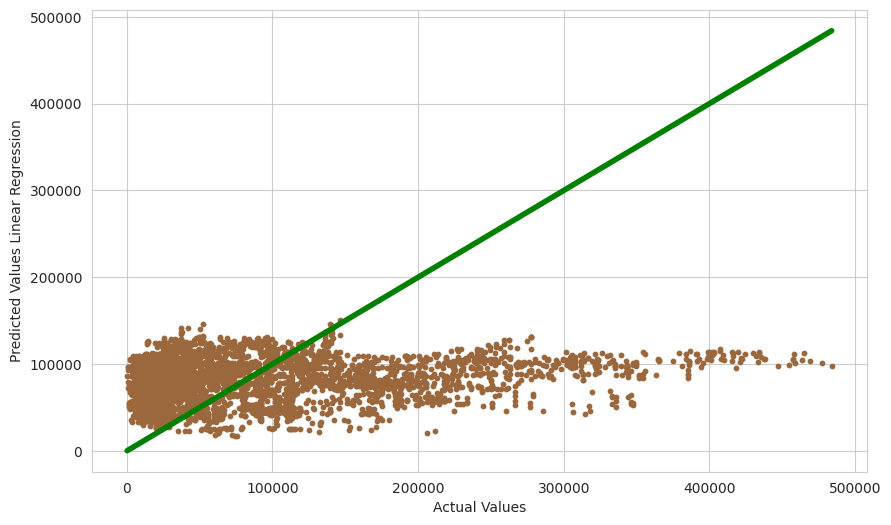

In [44]:
plt.scatter(y_test, y_pred_linear, s=10, color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=4)
plt.show()

# Lasso regressor

In [45]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [46]:
y_pred_lasso = lasso_model.predict(X_test)

In [47]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
accuracy_lasso = r2_lasso

print(f"Lasso Regression:")
print(f" - Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f" - R-squared (R2): {r2_lasso:.4f}")
print(f" - Accuracy (R2): {accuracy_lasso:.4f}")

Lasso Regression:
 - Mean Squared Error (MSE): 6687860804.4377
 - R-squared (R2): 0.0780
 - Accuracy (R2): 0.0780


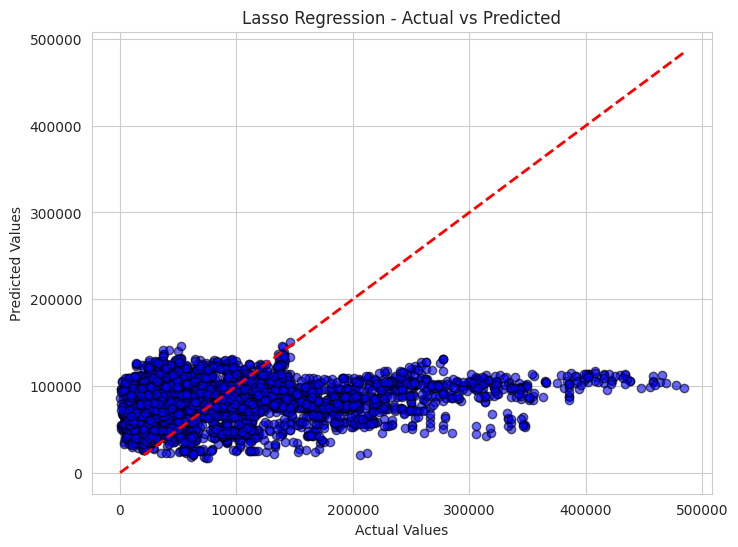

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title('Lasso Regression - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

#Ridge

In [49]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [50]:
y_pred_ridge = ridge_model.predict(X_test)

In [51]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
accuracy_ridge = r2_ridge

print(f"Ridge Regression:")
print(f" - Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f" - R-squared (R2): {r2_ridge:.4f}")
print(f" - Accuracy (R2): {accuracy_ridge:.4f}")

Ridge Regression:
 - Mean Squared Error (MSE): 6687860352.8582
 - R-squared (R2): 0.0780
 - Accuracy (R2): 0.0780


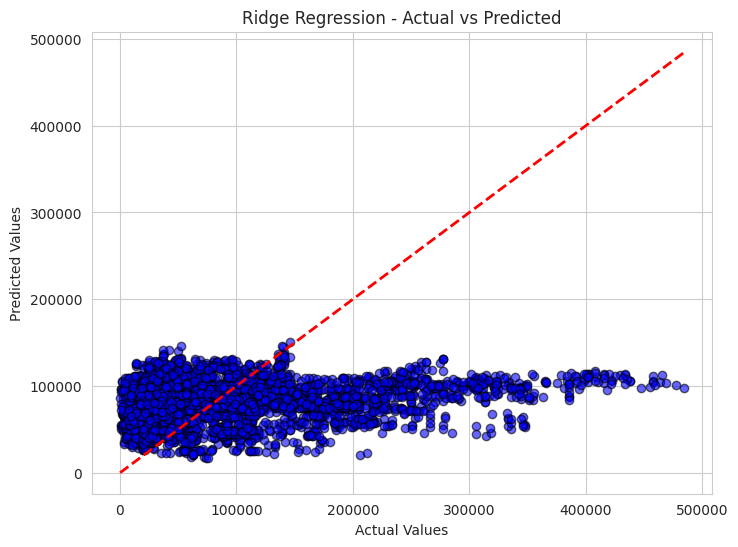

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title('Ridge Regression - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

#ElasticNet

In [53]:
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)

ElasticNet()

In [54]:
y_pred_elasticnet = elasticnet_model.predict(X_test)

In [55]:
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
accuracy_elasticnet = r2_elasticnet

print(f"ElasticNet Regression:")
print(f" - Mean Squared Error (MSE): {mse_elasticnet:.4f}")
print(f" - R-squared (R2): {r2_elasticnet:.4f}")
print(f" - Accuracy (R2): {accuracy_elasticnet:.4f}")

ElasticNet Regression:
 - Mean Squared Error (MSE): 6690159628.4352
 - R-squared (R2): 0.0777
 - Accuracy (R2): 0.0777


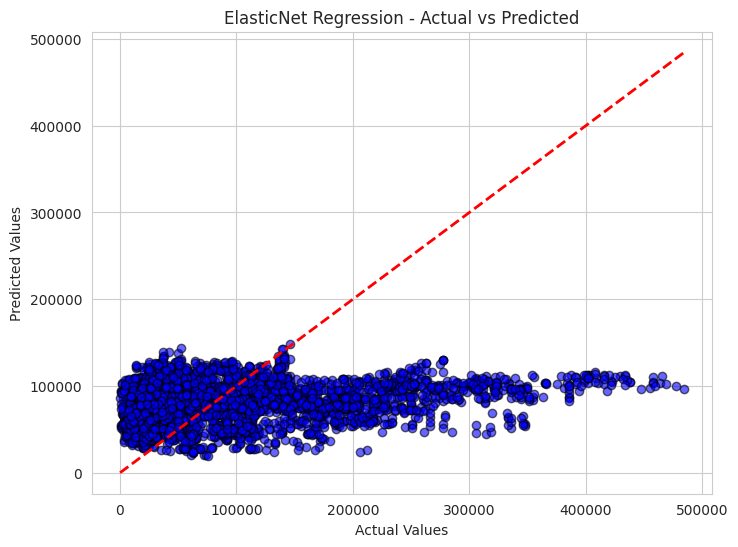

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_elasticnet, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title('ElasticNet Regression - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

#BayesianRidge

In [57]:
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(X_train, y_train)

BayesianRidge()

In [58]:
y_pred_bayesian = bayesian_ridge_model.predict(X_test)

In [59]:
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
r2_bayesian = r2_score(y_test, y_pred_bayesian)
accuracy_bayesian = r2_bayesian

print(f"Bayesian Ridge Regression:")
print(f" - Mean Squared Error (MSE): {mse_bayesian:.4f}")
print(f" - R-squared (R2): {r2_bayesian:.4f}")
print(f" - Accuracy (R2): {accuracy_bayesian:.4f}")

Bayesian Ridge Regression:
 - Mean Squared Error (MSE): 7224075449.3052
 - R-squared (R2): 0.0041
 - Accuracy (R2): 0.0041


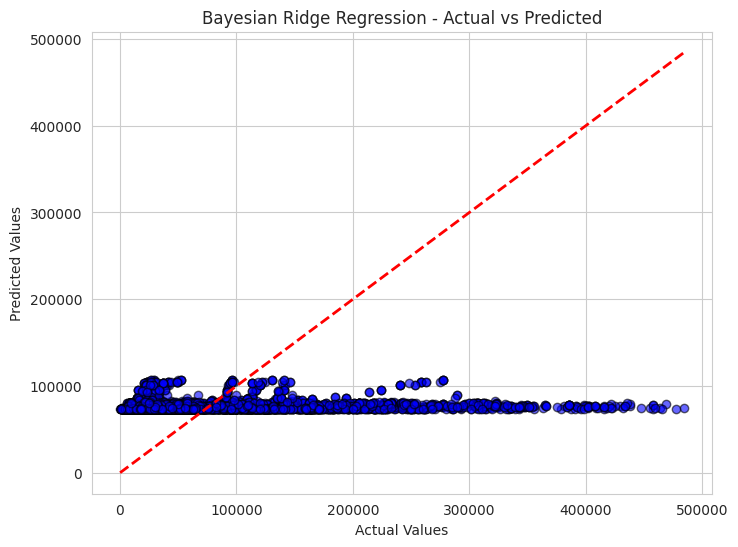

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_bayesian, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title('Bayesian Ridge Regression - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

#SGDRegressor

In [61]:
sgd_regressor_model = SGDRegressor(loss='squared_error', alpha=0.0001, random_state=42)
sgd_regressor_model.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [62]:
y_pred_sgd = sgd_regressor_model.predict(X_test)

In [63]:
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)
accuracy_sgd = r2_sgd

print(f"SGD Regressor:")
print(f" - Mean Squared Error (MSE): {mse_sgd:.4f}")
print(f" - R-squared (R2): {r2_sgd:.4f}")
print(f" - Accuracy (R2): {accuracy_sgd:.4f}")

SGD Regressor:
 - Mean Squared Error (MSE): 235022724954760360821293224493580288.0000
 - R-squared (R2): -32400517406734150138855424.0000
 - Accuracy (R2): -32400517406734150138855424.0000


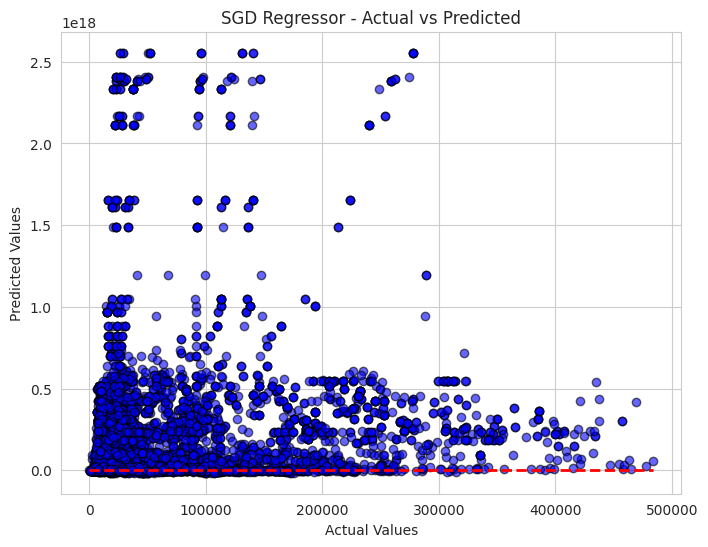

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_sgd, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title('SGD Regressor - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

#KNeighborsRegressor

In [65]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [66]:
y_pred_knn = knn_model.predict(X_test)

In [67]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
accuracy_knn = r2_knn

print(f"KNeighborsRegressor:")
print(f" - Mean Squared Error (MSE): {mse_knn:.4f}")
print(f" - R-squared (R2): {r2_knn:.4f}")
print(f" - Accuracy (R2): {accuracy_knn:.4f}")

KNeighborsRegressor:
 - Mean Squared Error (MSE): 4326783135.9564
 - R-squared (R2): 0.4035
 - Accuracy (R2): 0.4035


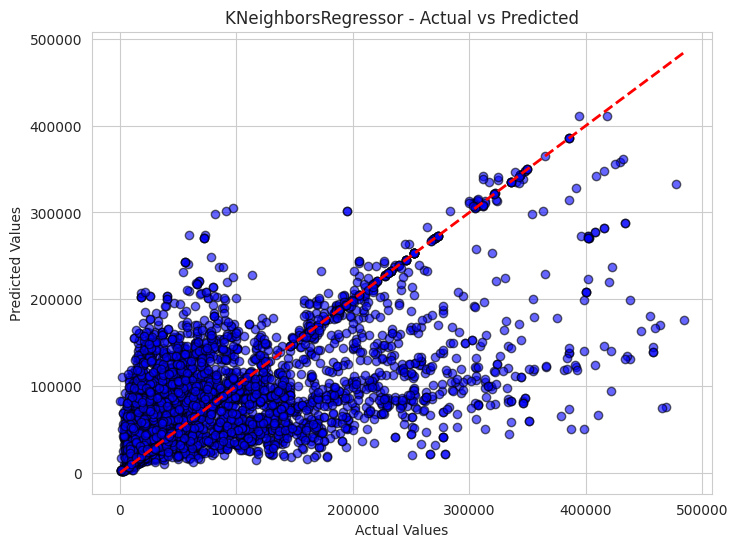

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title('KNeighborsRegressor - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

#GradientBoostingRegressor

In [69]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [70]:
y_pred_gb = gb_model.predict(X_test)

In [71]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
accuracy_gb = r2_gb

print(f"GradientBoostingRegressor:")
print(f" - Mean Squared Error (MSE): {mse_gb:.4f}")
print(f" - R-squared (R2): {r2_gb:.4f}")
print(f" - Accuracy (R2): {accuracy_gb:.4f}")

GradientBoostingRegressor:
 - Mean Squared Error (MSE): 1256828460.3436
 - R-squared (R2): 0.8267
 - Accuracy (R2): 0.8267


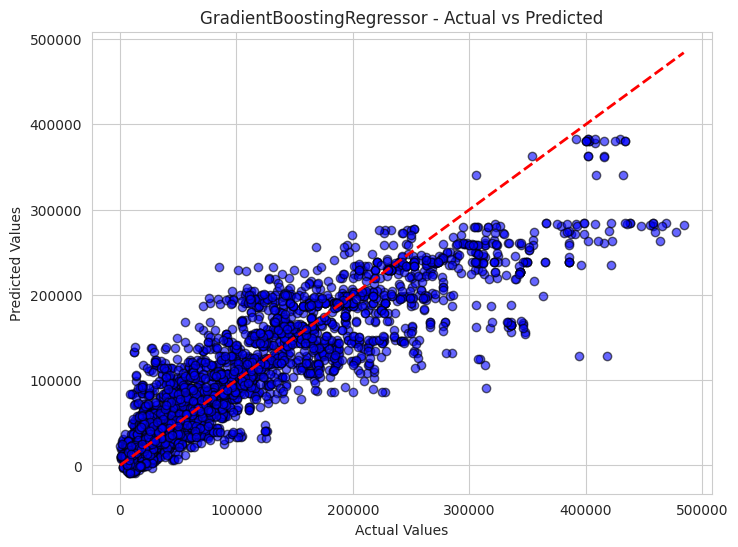

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title('GradientBoostingRegressor - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

#AdaBoostRegressor

In [73]:
ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

In [74]:
y_pred_ada = ada_model.predict(X_test)


In [75]:
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
accuracy_ada = r2_ada

print(f"AdaBoostRegressor:")
print(f" - Mean Squared Error (MSE): {mse_ada:.4f}")
print(f" - R-squared (R2): {r2_ada:.4f}")
print(f" - Accuracy (R2): {accuracy_ada:.4f}")

AdaBoostRegressor:
 - Mean Squared Error (MSE): 5404833972.9623
 - R-squared (R2): 0.2549
 - Accuracy (R2): 0.2549


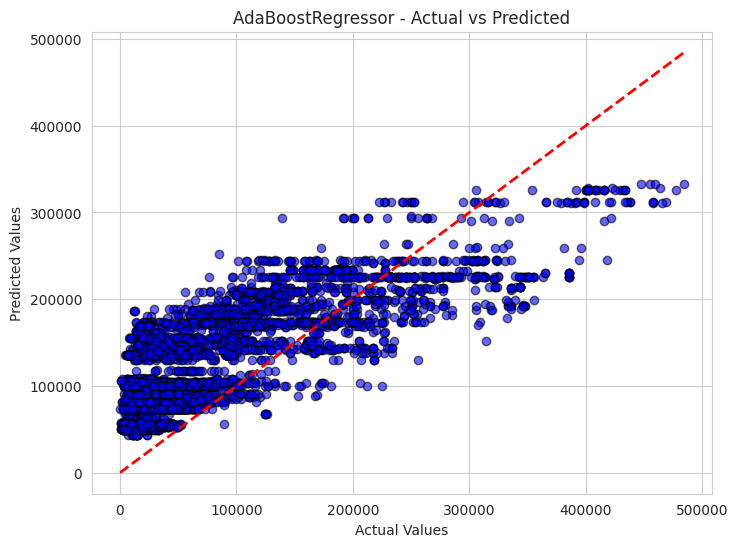

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ada, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title('AdaBoostRegressor - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# BaggingRegressor

In [77]:
bagging_model = BaggingRegressor(random_state=42)
bagging_model.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [78]:
y_pred_bagging = bagging_model.predict(X_test)

In [79]:
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)
accuracy_bagging = r2_bagging

print(f"Bagging Regressor:")
print(f" - Mean Squared Error (MSE): {mse_bagging:.4f}")
print(f" - R-squared (R2): {r2_bagging:.4f}")
print(f" - Accuracy (R2): {accuracy_bagging:.4f}")

Bagging Regressor:
 - Mean Squared Error (MSE): 205767138.1639
 - R-squared (R2): 0.9716
 - Accuracy (R2): 0.9716


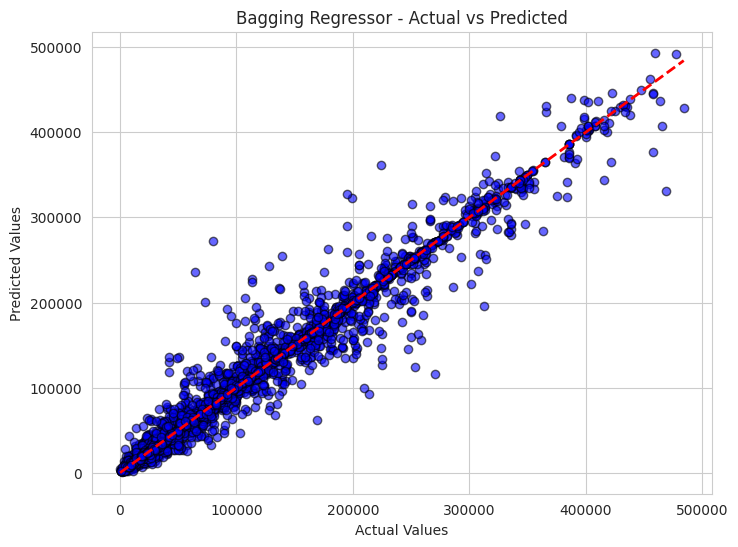

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_bagging, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title('Bagging Regressor - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# ExtraTreesRegressor

In [81]:
extra_trees_model = ExtraTreesRegressor(random_state=42)
extra_trees_model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [82]:
y_pred_extra_trees = extra_trees_model.predict(X_test)

In [83]:
mse_extra_trees = mean_squared_error(y_test, y_pred_extra_trees)
r2_extra_trees = r2_score(y_test, y_pred_extra_trees)
accuracy_extra_trees = r2_extra_trees

print(f"Extra Trees Regressor:")
print(f" - Mean Squared Error (MSE): {mse_extra_trees:.4f}")
print(f" - R-squared (R2): {r2_extra_trees:.4f}")
print(f" - Accuracy (R2): {accuracy_extra_trees:.4f}")

Extra Trees Regressor:
 - Mean Squared Error (MSE): 193876564.0716
 - R-squared (R2): 0.9733
 - Accuracy (R2): 0.9733


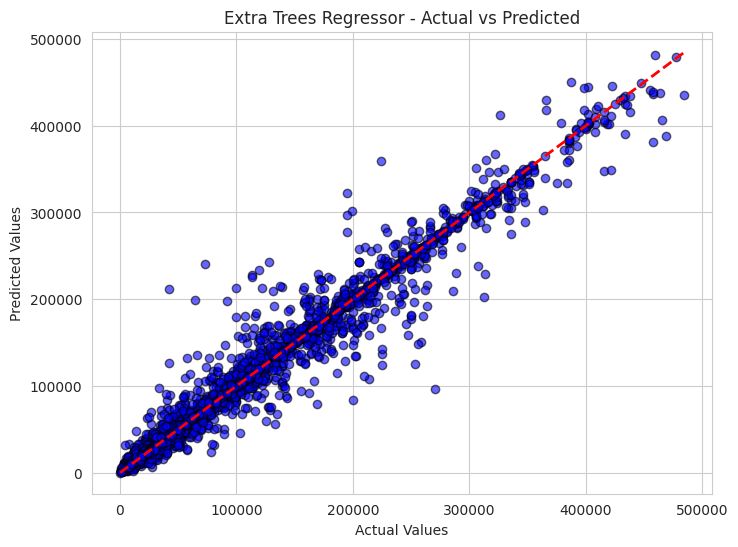

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_extra_trees, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title('Extra Trees Regressor - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# SVR

In [85]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [86]:
y_pred_svr = svr_model.predict(X_test)

In [87]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
accuracy_svr = r2_svr

print(f"SVR:")
print(f" - Mean Squared Error (MSE): {mse_svr:.4f}")
print(f" - R-squared (R2): {r2_svr:.4f}")
print(f" - Accuracy (R2): {accuracy_svr:.4f}")

SVR:
 - Mean Squared Error (MSE): 8739216330.5197
 - R-squared (R2): -0.2048
 - Accuracy (R2): -0.2048


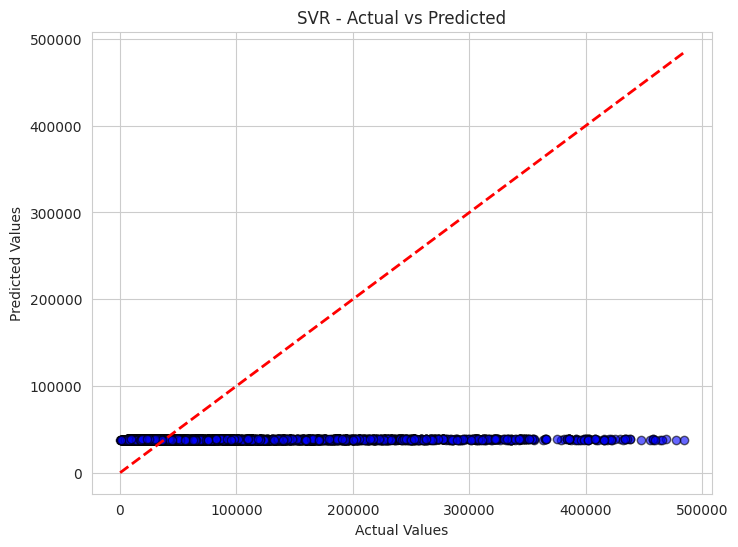

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title('SVR - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# MLPRegressor

In [89]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50),
                         activation='relu',
                         solver='adam',
                         random_state=42,
                         max_iter=200)
mlp_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42)

In [90]:
y_pred_mlp = mlp_model.predict(X_test)

In [91]:
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
accuracy_mlp = r2_mlp

print(f"MLP Regressor:")
print(f" - Mean Squared Error (MSE): {mse_mlp:.4f}")
print(f" - R-squared (R2): {r2_mlp:.4f}")
print(f" - Accuracy (R2): {accuracy_mlp:.4f}")

MLP Regressor:
 - Mean Squared Error (MSE): 7490029763.1200
 - R-squared (R2): -0.0326
 - Accuracy (R2): -0.0326


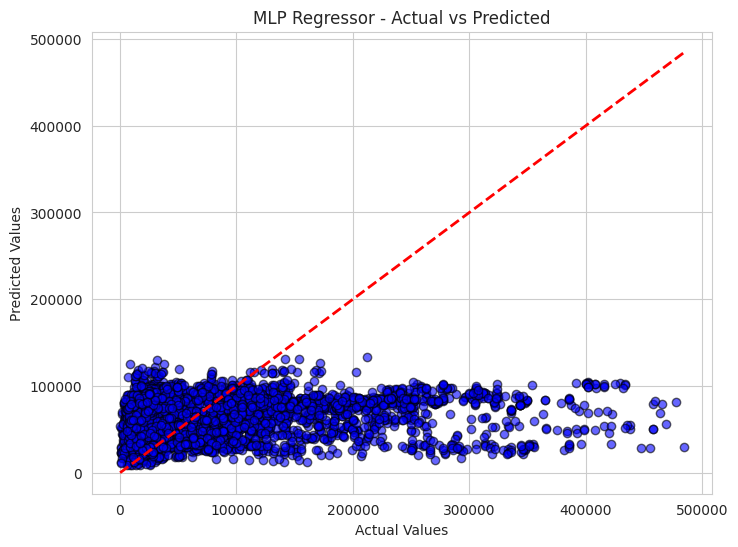

In [92]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mlp, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title('MLP Regressor - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

#CatBoostRegressor

In [93]:
catboost_model = CatBoostRegressor(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)

In [94]:
y_pred_catboost = catboost_model.predict(X_test)

In [95]:
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)
accuracy_catboost = r2_catboost


print(f"CatBoost Regressor:")
print(f" - Mean Squared Error (MSE): {mse_catboost:.4f}")
print(f" - R-squared (R2): {r2_catboost:.4f}")
print(f" - Accuracy (R2): {accuracy_catboost:.4f}")

CatBoost Regressor:
 - Mean Squared Error (MSE): 286724059.6720
 - R-squared (R2): 0.9605
 - Accuracy (R2): 0.9605


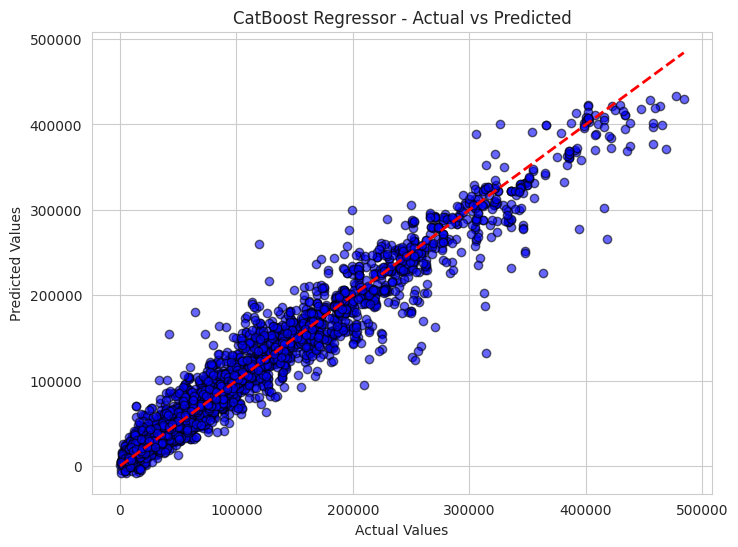

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_catboost, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title('CatBoost Regressor - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

#DecisionTreeregressor

In [97]:
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [98]:
y_pred = tree_regressor.predict(X_test)

In [99]:
mse_DTreeReg = mean_squared_error(y_test, y_pred)
r2_DTreeReg = r2_score(y_test, y_pred)
accuracy_DTreeReg = tree_regressor.score(X_test, y_test)
print(f"DecisionTreeRegressor:")
print(f" - Mean Squared Error (MSE): {mse_DTreeReg:.4f}")
print(f" - R-squared (R2): {r2_DTreeReg:.4f}")
print(f" - Accuracy (R2): {accuracy_DTreeReg:.4f}")

DecisionTreeRegressor:
 - Mean Squared Error (MSE): 302668263.5391
 - R-squared (R2): 0.9583
 - Accuracy (R2): 0.9583


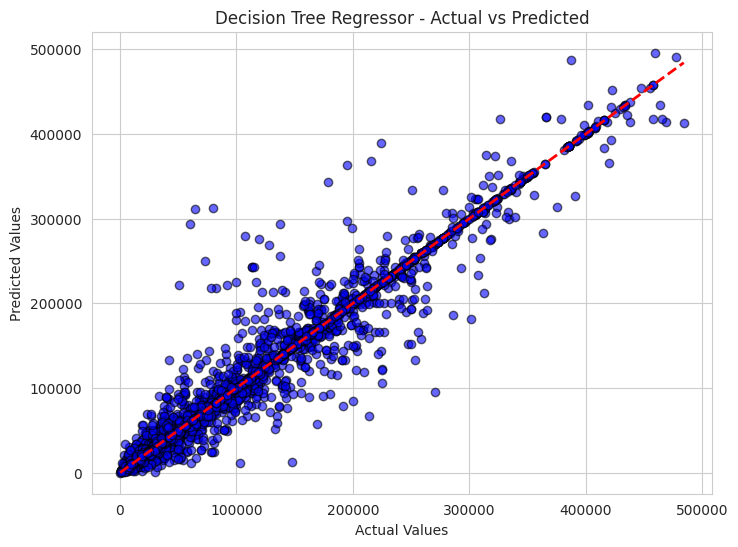

In [101]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title('Decision Tree Regressor - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [102]:
import pandas as pd
results = []
results.append(['CatBoost Regressor', accuracy_catboost, mse_catboost, r2_catboost])
results.append(['XGBRegressor', accuracy_xgb, rmse_xgb**2, accuracy_xgb])
results.append(['RandomForestRegressor', accuracy_rf, rmse_rf**2, accuracy_rf])
results.append(['Linear Regression', accuracy_linear, rmse_linear**2, r2_linear])
results.append(['Lasso', accuracy_lasso, mse_lasso, r2_lasso])
results.append(['Ridge', accuracy_ridge, mse_ridge, r2_ridge])
results.append(['ElasticNet', accuracy_elasticnet, mse_elasticnet, r2_elasticnet])
results.append(['Bayesian Ridge', accuracy_bayesian, mse_bayesian, r2_bayesian])
results.append(['SGD Regressor', accuracy_sgd, mse_sgd, r2_sgd])
results.append(['KNeighborsRegressor', accuracy_knn, mse_knn, r2_knn])
results.append(['GradientBoostingRegressor', accuracy_gb, mse_gb, r2_gb])
results.append(['AdaBoostRegressor', accuracy_ada, mse_ada, r2_ada])
results.append(['BaggingRegressor', accuracy_bagging, mse_bagging, r2_bagging])
results.append(['ExtraTreesRegressor', accuracy_extra_trees, mse_extra_trees, r2_extra_trees])
results.append(['SVR', accuracy_svr, mse_svr, r2_svr])
results.append(['MLPRegressor', accuracy_mlp, mse_mlp, r2_mlp])
results.append(['DecisionTreeRegressor', accuracy_DTreeReg, mse_DTreeReg, r2_DTreeReg])

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])

df_styled_best = dff.style.highlight_max(subset=['Accuracy', 'R2_score'], color='green') \
    .highlight_min(subset=['MSE'], color='green') \
    .highlight_max(subset=['MSE'], color='red') \
    .highlight_min(subset=['Accuracy', 'R2_score'], color='red')

display(df_styled_best)

,Model,Accuracy,MSE,R2_score
0,CatBoost Regressor,0.960472,286724059.672012,0.960472
1,XGBRegressor,0.965974,246811200.000000,0.965974
2,RandomForestRegressor,0.972955,196175930.972520,0.972955
3,Linear Regression,0.078003,6687860316.681626,0.078003
4,Lasso,0.078003,6687860804.437660,0.078003
5,Ridge,0.078003,6687860352.858238,0.078003
6,ElasticNet,0.077686,6690159628.435212,0.077686
7,Bayesian Ridge,0.004080,7224075449.305215,0.004080
8,SGD Regressor,-32400517406734150138855424.000000,235022724954760360821293224493580288.000000,-32400517406734150138855424.000000
9,KNeighborsRegressor,0.403504,4326783135.956431,0.403504


In [103]:
import plotly.express as px

dff = dff.rename(columns={'Accuracy': 'Score'})

models_sorted = dff.sort_values(by='Score', ascending=True)

fig = px.line(
    data_frame=models_sorted,
    x='Model',
    y='Score',
    color='Score',
    template='plotly_dark',
    title='Models Comparison',
    markers=True
)

fig.show()

In [104]:
!pip install streamlit==1.25.0

In [105]:
import pickle

# Assuming 'catboost_model' is your best performing model
with open('crop_yield_model.pkl', 'wb') as file:
    pickle.dump(catboost_model, file)

In [106]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the trained model
with open('crop_yield_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load original data for label encoders
try:
    data = pd.read_csv('/content/yield_df.csv')  # Modify path if needed
except FileNotFoundError:
    st.error("Error: 'yield_df.csv' not found. Please make sure it's uploaded to Colab.")
    st.stop()  # Stop app execution if file not found

# Create and fit label encoders
le_country = LabelEncoder()
le_item = LabelEncoder()
le_country.fit(data['Area'])
le_item.fit(data['Item'])

def predict_yield(country, item, pesticides, avg_temp, rainfall):
    """Predicts crop yield based on input features."""
    input_data = pd.DataFrame({
        'Country_Encoded': [le_country.transform([country])[0]],
        'Item_Encoded': [le_item.transform([item])[0]],
        'Pesticides': [pesticides],
        'Avg_Temp': [avg_temp],
        'Rainfall': [rainfall]
    })
    prediction = model.predict(input_data)[0]
    return prediction

# Streamlit app
st.title("Crop Yield Prediction")

country = st.selectbox("Country", data['Area'].unique())
item = st.selectbox("Crop Item", data['Item'].unique())
pesticides = st.number_input("Pesticides (tonnes)", value=100.0)
avg_temp = st.number_input("Average Temperature (°C)", value=25.0)
rainfall = st.number_input("Rainfall (mm/year)", value=1000.0)

if st.button("Predict"):
    predicted_yield = predict_yield(country, item, pesticides, avg_temp, rainfall)
    st.success(f"Predicted Yield for {item} in {country}: {predicted_yield:.2f} hg/ha")

Overwriting app.py


In [110]:
!wget -q -O - ipv4.icanhazip.com

34.170.48.181


In [111]:
!streamlit run app.py & npx localtunnel --port 8501 --subdomain your-subdomain

⠙⠹⠸⠼⠴⠦⠧

your url is: https://your-subdomain.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.170.48.181:8501

  Stopping...
^C
